In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

In [118]:
data = pd.read_csv("../data/interum/track_data.zip")

In [119]:
day_df = data[data.release_date_precision == "day"].copy()

## Converting to datetime and dealing with missing values

In [120]:
def convert_datetime(x):
    try:
        return pd.to_datetime(x)
    except:
        return np.NaN
        
        
day_df.release_date = day_df.release_date.apply(convert_datetime)

In [121]:
day_df.dropna(inplace=True)

In [122]:
ts_df = day_df.sort_values("release_date").set_index("release_date").copy()

In [123]:
ts_df = ts_df.resample("m").mean()

In [124]:
ts_df.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature
release_date,,,,,,,,,,,,,
1899-12-31,0.564333,0.0543,4.333333,-23.957333,1.0,0.038767,0.972333,0.78,0.109333,0.520333,112.514333,153493.0,4.0
1900-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature plotting

In [125]:
def plot_feature(feature, start="1950", stop="2019"):
    plt.figure(figsize=(16,8))
    ts_df[start:stop][feature].plot()
    ts_df[start:stop].resample("y").mean()[feature].plot()
    plt.show()

## Loudness from 1970

Check for NAs in our date range. This is needed for decomposition later

In [126]:
ts_df["1970":].Loudness.isna().sum()

2

fill nas with previous value

In [127]:
ts_df["1970":].Loudness = ts_df["1970":].Loudness.fillna(method="ffill").copy()

/home/qdizon/.local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Initial plot of loudness

Seems to indicate that there is high variability until around 2000 when we see loudness become more standardized. No clear seasonality.

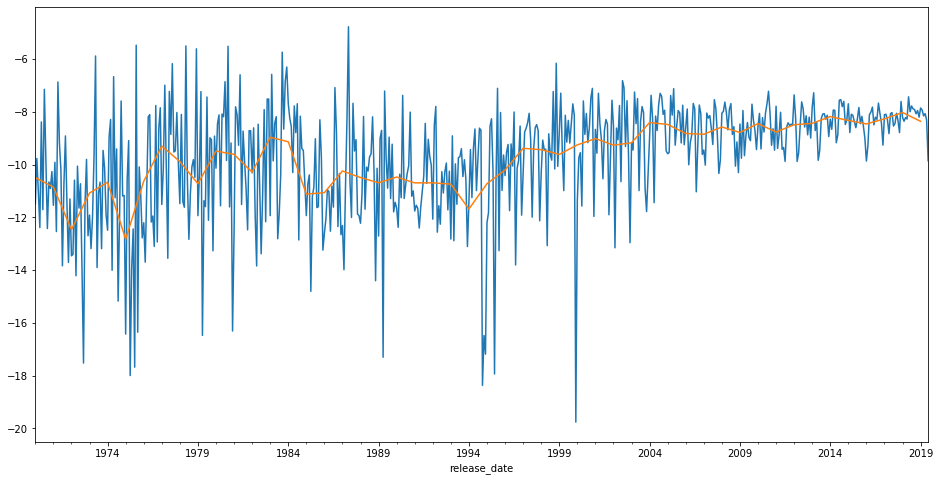

In [129]:
plot_feature(feature="Loudness", start="1970")

Decomposition to see trend and risiduals  

Supports initial assessment that variability reduces over time (after 2000 or so). 

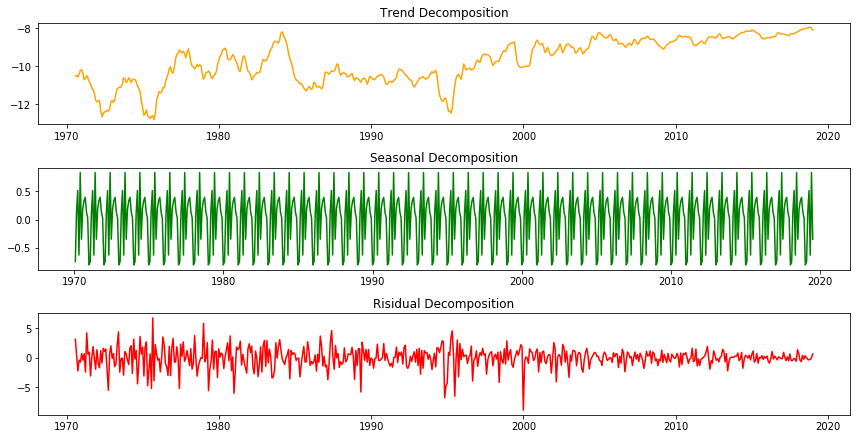

In [130]:
decomposition = seasonal_decompose(ts_df["1970":].Loudness)

# Gather the trend, seasonality and risidual (noise) of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the various graphs
plt.figure(figsize=(12,8))

plt.subplot(412)
plt.plot(trend, label='Trend', color="orange")
plt.title("Trend Decomposition")

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="green")
plt.title("Seasonal Decomposition")

plt.subplot(414)
plt.plot(residual, label='Residuals', color="red")
plt.title("Risidual Decomposition")

plt.tight_layout()

In [131]:
print(ts_df["1970":].Loudness.min())
print(ts_df["1970":].Loudness.max())

-19.764000000000006
-4.77695


## Speechness Time Series Analysis

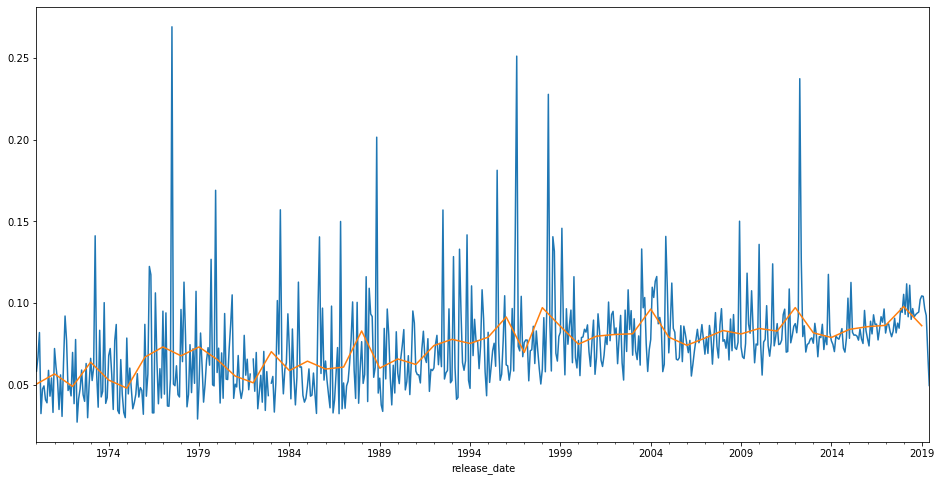

In [132]:
plot_feature(feature="Speechness", start="1970")

## Tempo Time Series Analysis

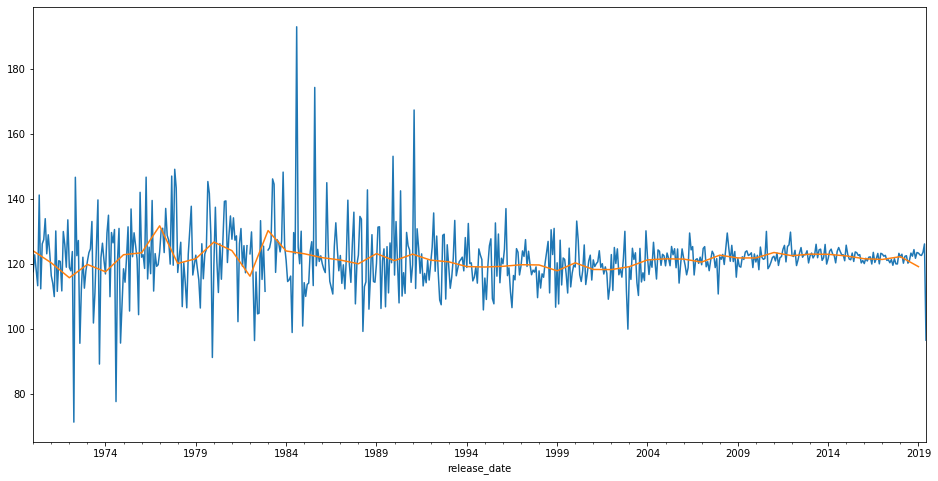

In [134]:
plot_feature(feature="Tempo", start="1970")

## Duration Time Series Analysis

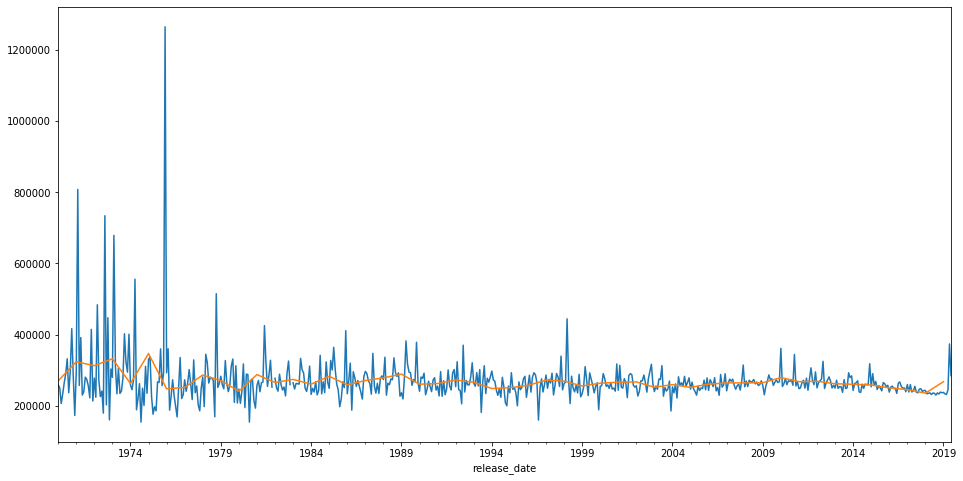

In [135]:
plot_feature(feature="Duration_ms", start="1970")

## Valance & Mode

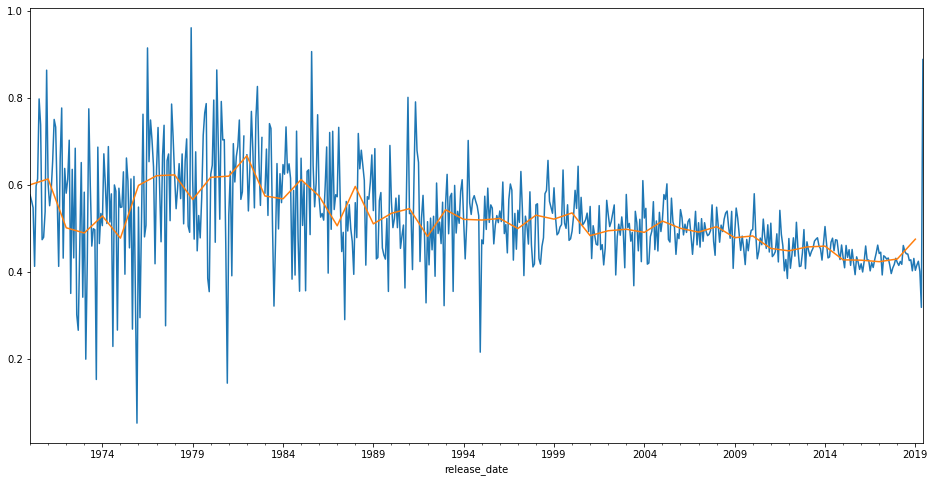

In [137]:
plot_feature(feature="Valence", start="1970")

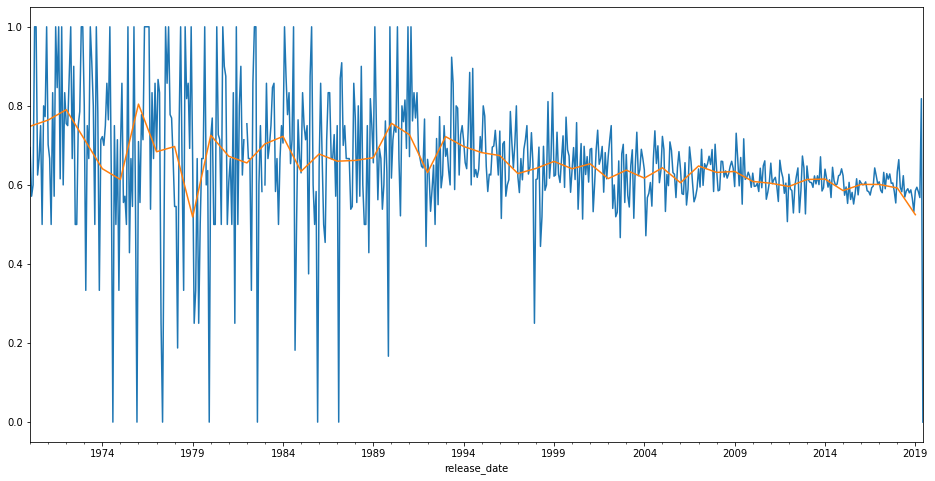

In [138]:
plot_feature(feature="Mode", start="1970")

## Energy

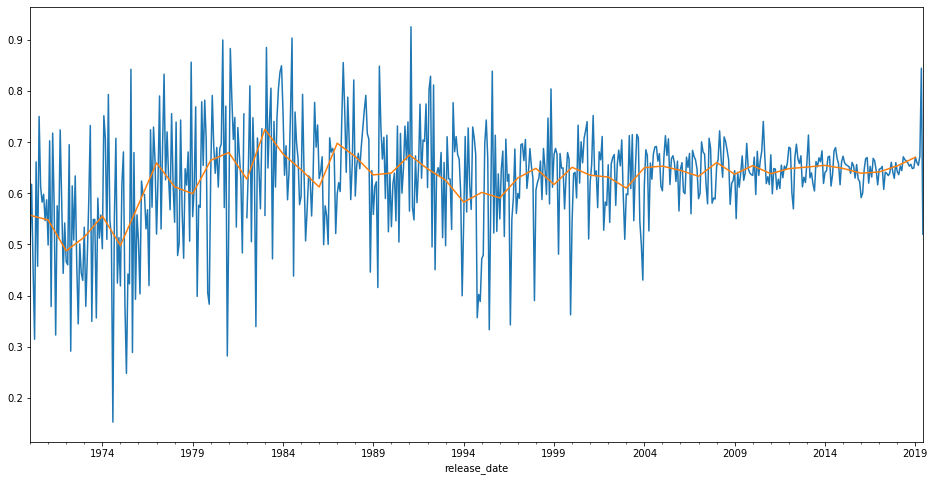

In [139]:
plot_feature(feature="Energy", start="1970")

## Key

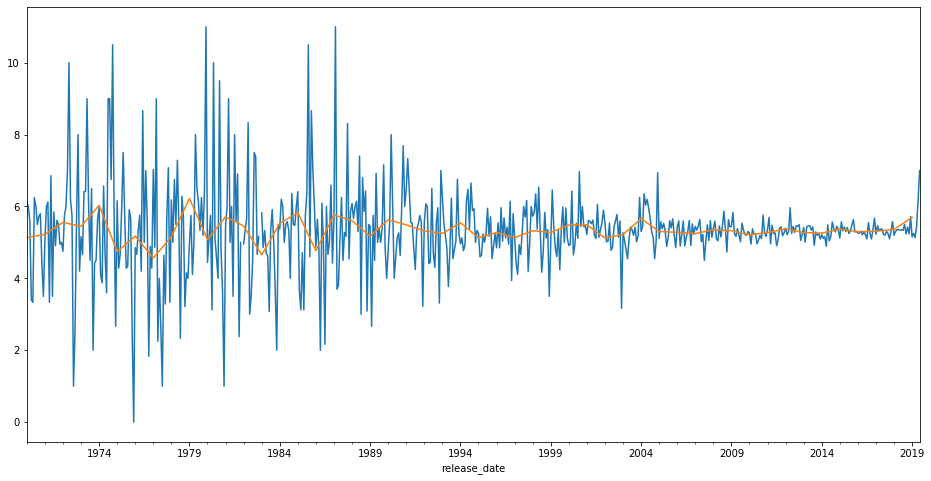

In [140]:
plot_feature(feature="Key", start="1970")